### Install Procsim

In [89]:
!pip install procsimulator==0.1.0

### Import Modules

In [1]:
import procsimulator
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from procsimulator.CommunityGenerator import CommunityGenerator
from procsimulator.ConsumptionGenerator import ConsumptionGenerator
from procsimulator.DataFromSmile import DataFromSmile
from procsimulator.DataFromTomorrow import DataFromTomorrow
from procsimulator.RenewableEnergyGenerator import RenewableEnergyGenerator
from procsimulator.CommunityGenerator import CommunityGenerator
from procsimulator.Evaluation import Evaluation

### Get current path

In [3]:
current_path = os.getcwd()
print(current_path)

C:\Users\Nuno.Velosa.CORP\OneDrive - Unipartner IT Services, S.A\Desktop\pyomo_experiments\paper_experiments


### Generation of the consumption profiles

In [4]:
path_steps_seconds = os.path.join(current_path, "..")
path_steps_minutes = "../output/minute"
num_days = "7"

Creating simulation files for each user
Creating simulation file for users of house 0
Creating simulation file for user Ann
Creating simulation file for user baseload
Creating simulation file for users of house 1
Creating simulation file for user Ann
Creating simulation file for user baseload
Creating simulation file for users of house 2
Creating simulation file for user Ann
Creating simulation file for user Bill
Creating simulation file for user baseload
Creating simulation file for users of house 3
Creating simulation file for user Ann
Creating simulation file for user Bill
Creating simulation file for user John
Creating simulation file for user Toby
Creating simulation file for user baseload
Creating simulation file for users of house 4
Creating simulation file for user Ann
Creating simulation file for user Bill
Creating simulation file for user John
Creating simulation file for user baseload
Creating simulation files for each house
Creating simulation file for house 0
Creating simu

Resampling the data of file REFRIGERATOR.csv of house 3
Resampling the data of file TOASTER.csv of house 3
Resampling the data of file Toby.csv of house 3
Resampling the data of file total.csv of house 3
Resampling the data of file TV.csv of house 3
Resampling the data of file use_a_personal_computer.csv of house 3
Resampling the data of file VACUUMCLEANER.csv of house 3
Resampling the data of file vacuuming.csv of house 3
Resampling the data of file WASHINGMACHINE.csv of house 3
Resampling the data of file washing_a_load_of_laundry.csv of house 3
Resampling the data of file watching_TV.csv of house 3
Resampling the files of HOUSE 4
Resampling the data of file AMPLIFIER.csv of house 4
Resampling the data of file Ann.csv of house 4
Resampling the data of file baseload.csv of house 4
Resampling the data of file Bill.csv of house 4
Resampling the data of file BREADCUTTER.csv of house 4
Resampling the data of file CDPLAYER.csv of house 4
Resampling the data of file COFFEEMAKER.csv of house

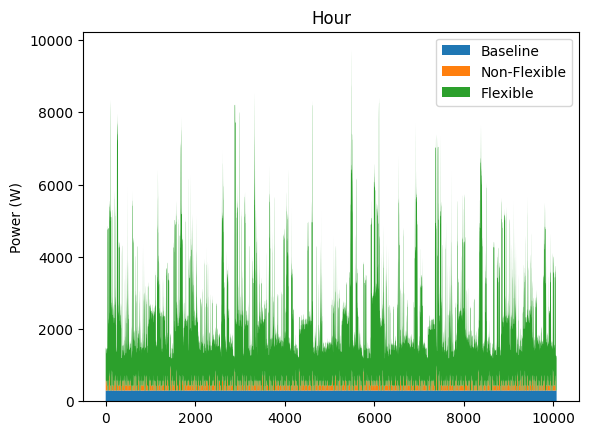

In [5]:
cg = ConsumptionGenerator("../data.json", path_steps_seconds, path_steps_minutes)
cg.execute(num_days, "houses")

### Generation of PV and Wind Production

In [6]:
pv_dat = DataFromSmile("https://ems.prsma.com/solcast/public/Fazendinha_solcast-radiation-historical_30min.csv")
#wind_dat = DataFromTomorrow("https://api.tomorrow.io/v4/timelines?location=-73.98529171943665,40.75872069597532&fields=pressureSurfaceLevel,pressureSeaLevel,precipitationIntensity,precipitationType,windSpeed,windGust,windDirection,temperature,temperatureApparent,cloudCover,cloudBase,cloudCeiling,weatherCode&timesteps=1h&units=metric&apikey=Yckmp3vREbJqyprWGGiTOC1pVaAYO0ZT")
wind_dat = DataFromTomorrow("https://api.tomorrow.io/v4/timelines?startTime=now&endTime=nowPlus8d&location=-73.98529171943665,40.75872069597532&fields=pressureSurfaceLevel,pressureSeaLevel,precipitationIntensity,precipitationType,windSpeed,windGust,windDirection,temperature,temperatureApparent,cloudCover,cloudBase,cloudCeiling,weatherCode&timesteps=1h&units=metric&apikey=Yckmp3vREbJqyprWGGiTOC1pVaAYO0ZT")
reg = RenewableEnergyGenerator(cg, pv_dat, wind_dat, cg.path_steps_minutes)

reg.execute(num_days)

Renewable Energy Generator
Calculating the contracted power of the community
energy contracted: 14950.0


C:\Users\Nuno.Velosa.CORP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\io\parsers\base_parser.py:1055: FutureWarning: 
        Use pd.to_datetime instead.

  return generic_parser(date_parser, *date_cols)


                     Date  PV_Production       Demand  Wind_Production  \
0     2022-11-27 00:00:00            0.0  1051.223333      2755.725373   
1     2022-11-27 00:01:00            0.0  1120.191667      2777.570346   
2     2022-11-27 00:02:00            0.0  1200.915000      2798.620373   
3     2022-11-27 00:03:00            0.0  1191.496667      2818.885116   
4     2022-11-27 00:04:00            0.0  1178.795000      2838.374237   
...                   ...            ...          ...              ...   
10074 2022-12-03 23:54:00            0.0   952.108333     12974.960347   
10075 2022-12-03 23:55:00            0.0   950.246667     12984.506887   
10076 2022-12-03 23:56:00            0.0   940.765000     12994.053421   
10077 2022-12-03 23:57:00            0.0   921.718333     13003.599950   
10078 2022-12-03 23:58:00            0.0   914.428333     13013.146473   

         Production  
0       2755.725373  
1       2777.570346  
2       2798.620373  
3       2818.885116  
4

### Calculation of netload and Generation of the EC dataset

In [7]:
cmg = CommunityGenerator(cg.path_steps_minutes)
cmg.execute()

Calculating netload of the community


### Calculate metrics in the EC dataset

In [8]:
df = pd.read_csv(path_steps_minutes + '/netload.csv', sep=';')
evaluation = Evaluation(df, 0)

print("Average Power Used from Grid: " + "{:.2f}".format(evaluation.get_average_power_used_from_grid()) + " kW")
print("Average Power Used from PV: " + "{:.2f}".format(evaluation.get_average_power_used_from_pv()) + " kW")
print("Average Power Not Used from PV: " + "{:.2f}".format(evaluation.get_average_power_not_used_from_pv()) + " kW")
print("Energy Used from Grid: " + "{:.2f}".format(evaluation.get_energy_used_from_grid()) + " kWh")
print("Energy Used from PV: " + "{:.2f}".format(evaluation.get_energy_used_from_pv()) + " kWh")
print("Energy Not Used from PV: " + "{:.2f}".format(evaluation.get_energy_not_used_from_pv()) + " kWh")
print("Peaks Number: " + str(evaluation.get_peaks_number()))
print("Self Sufficiency (SS): " + "{:.2f}".format(evaluation.get_self_sufficiency()*100) + "%")
print("Self Consumption (SC): " + "{:.2f}".format(evaluation.get_self_consumption()*100) + "%")

Average Power Used from Grid: 1.77 kW
Average Power Used from PV: 1.36 kW
Average Power Not Used from PV: 4.48 kW
Energy Used from Grid: 42.49 kWh
Energy Used from PV: 32.69 kWh
Energy Not Used from PV: 107.59 kWh
Peaks Number: 5175
Self Sufficiency (SS): 43.48%
Self Consumption (SC): 23.30%


### Calculation of Community PPC

In [9]:
# Getting the community contracted power
community = cg.get_community()
print("Contracted Power: " + str(cg.calculate_contracted_power(community)))

Calculating the contracted power of the community
Contracted Power: 29900.0


### Community activities

In [10]:
cg.get_timeslots(community, True)

Creating the Timeslots of the community


[{'Start': '2022-11-27 09:57:00',
  'End': '2022-11-27 10:09:00',
  'Duration': '12',
  'max_power': 1137.3916666666669,
  'Power': 456.0516666666666,
  'Appliance': 'VACUUMCLEANER',
  'House': 0},
 {'Start': '2022-11-27 15:43:00',
  'End': '2022-11-27 15:55:00',
  'Duration': '12',
  'max_power': 1137.0783333333336,
  'Power': 532.0083333333333,
  'Appliance': 'VACUUMCLEANER',
  'House': 0},
 {'Start': '2022-11-28 09:43:00',
  'End': '2022-11-28 09:55:00',
  'Duration': '12',
  'max_power': 1135.78,
  'Power': 816.7,
  'Appliance': 'VACUUMCLEANER',
  'House': 0},
 {'Start': '2022-11-28 11:33:00',
  'End': '2022-11-28 11:45:00',
  'Duration': '12',
  'max_power': 1134.55,
  'Power': 1044.2733333333333,
  'Appliance': 'VACUUMCLEANER',
  'House': 0},
 {'Start': '2022-11-29 09:57:00',
  'End': '2022-11-29 10:09:00',
  'Duration': '12',
  'max_power': 1135.19,
  'Power': 930.5083333333332,
  'Appliance': 'VACUUMCLEANER',
  'House': 0},
 {'Start': '2022-11-29 16:02:00',
  'End': '2022-11-29

### Get the community netload

In [22]:
community_df = pd.read_csv(path_steps_minutes + '/netload.csv', sep=';')
community_df.columns = ['Date', 'Demand', 'PV_Production', 'Wind_Production', 'Production', 'Netload']
community_df['Date'] = pd.to_datetime(community_df['Date'])
community_df

,Date,Demand,PV_Production,Wind_Production,Production,Netload
0,2022-11-27 00:00:00,1051.223333,0.0,2755.725373,2755.725373,-1704.502040
1,2022-11-27 00:01:00,1120.191667,0.0,2777.570346,2777.570346,-1657.378679
2,2022-11-27 00:02:00,1200.915000,0.0,2798.620373,2798.620373,-1597.705373
3,2022-11-27 00:03:00,1191.496667,0.0,2818.885116,2818.885116,-1627.388449
4,2022-11-27 00:04:00,1178.795000,0.0,2838.374237,2838.374237,-1659.579237
...,...,...,...,...,...,...
10074,2022-12-03 23:54:00,952.108333,0.0,12974.960347,12974.960347,-12022.852014
10075,2022-12-03 23:55:00,950.246667,0.0,12984.506887,12984.506887,-12034.260220
10076,2022-12-03 23:56:00,940.765000,0.0,12994.053421,12994.053421,-12053.288421
10077,2022-12-03 23:57:00,921.718333,0.0,13003.599950,13003.599950,-12081.881616


### Plot Consumption

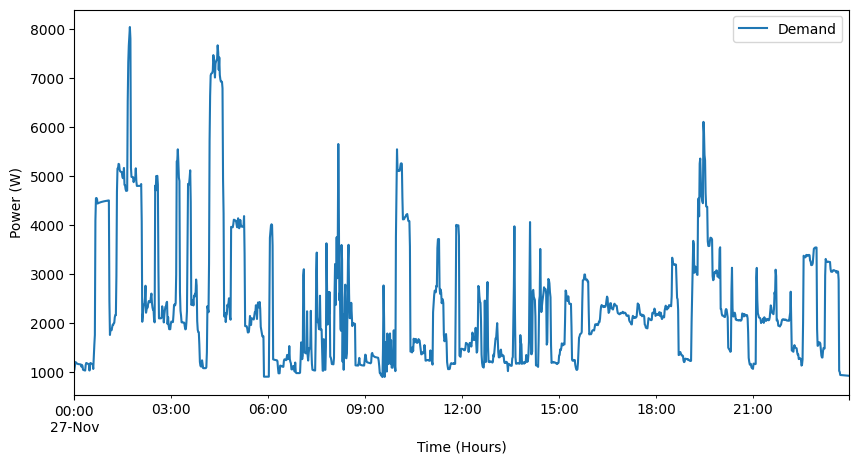

In [23]:
community_df = community_df.set_index("Date")
community_df[:24*60*1]["Demand"].plot(legend=True, label='Demand')
plt.rcParams['figure.figsize'] = [10, 5]
plt.xlabel("Time (Hours)")
plt.ylabel("Power (W)")
plt.show()

### Plot Consumption and Production

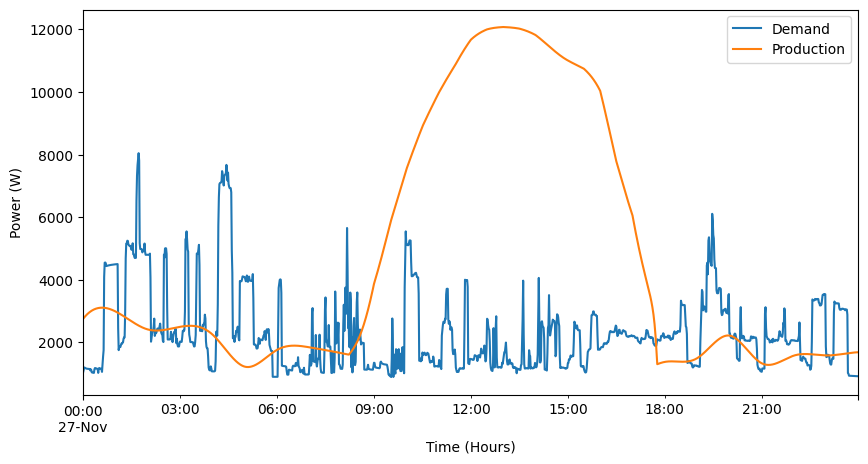

In [25]:
community_df[:24*60*1]["Demand"].plot(legend=True, label='Demand')
community_df[:24*60*1]["Production"].plot(legend=True, label='Production')
plt.rcParams['figure.figsize'] = [10, 5]
plt.xlabel("Time (Hours)")
plt.ylabel("Power (W)")
plt.show()

### Plot Flexible Consumption

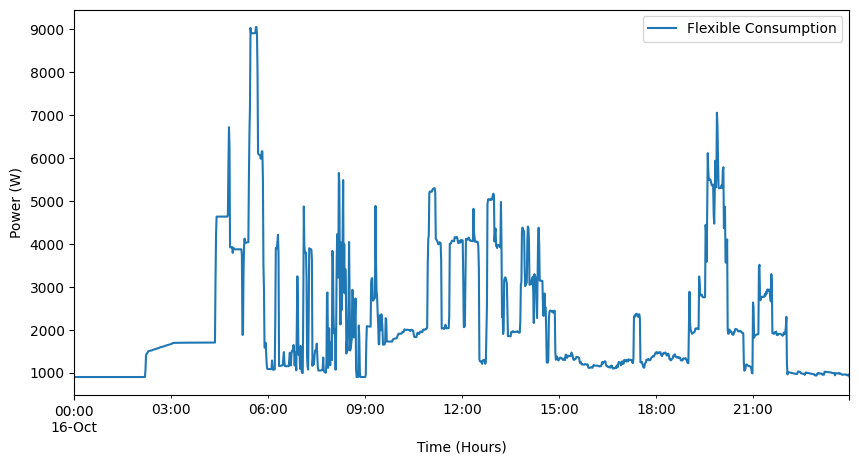

In [109]:
flexible_df = pd.read_csv(path_steps_minutes + '/community_not_baseload.csv', sep=';')
flexible_df.columns = ['Date', 'Power']
flexible_df['Date'] = pd.to_datetime(flexible_df['Date'])

flexible_df = flexible_df.set_index("Date")
flexible_df[:24*60]["Power"].plot(legend=True, label='Flexible Consumption')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (W)")
plt.show()

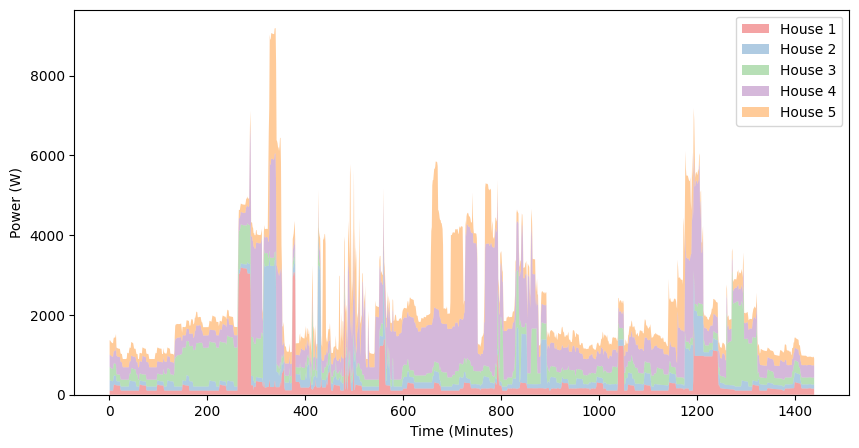

In [110]:
import seaborn as sns

houses_df = []
x = range(1,24*60+1)

for house_num in range(5):
    df = pd.read_csv(path_steps_minutes + '/house' + str(house_num) + '/total.csv', sep=';')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index("Date")
    houses_df.append(df["Power"][:24*60])
 
# use a known color palette
#pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
pal = sns.color_palette("Set1")
plt.stackplot(x,houses_df, labels=['House 1', 'House 2', 'House 3', 'House 4', 'House 5'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.xlabel("Time (Minutes)")
plt.ylabel("Power (W)")
plt.show()

### Plot Unflexible Consumption

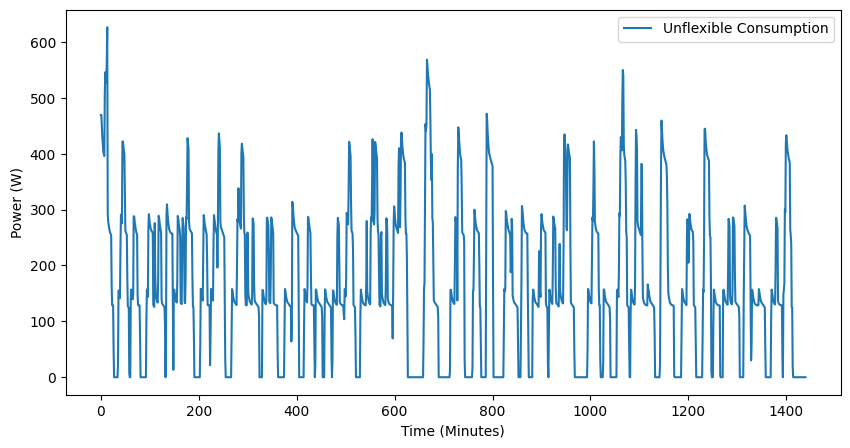

In [111]:
unflexible_df = pd.read_csv(path_steps_minutes + '/community_baseload.csv', sep=';')
unflexible_df.columns = ['Date', 'Power']
unflexible_df['Date'] = pd.to_datetime(unflexible_df['Date'])

unflexible_df[:24*60]["Power"].plot(legend=True, label='Unflexible Consumption')
plt.xlabel("Time (Minutes)")
plt.ylabel("Power (W)")
plt.show()

### Plot PV Production

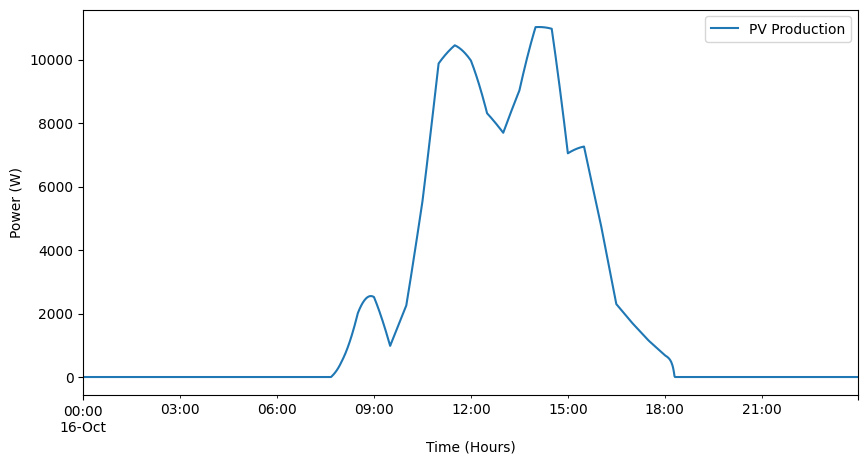

In [112]:
community_df[:24*60]["PV_Production"].plot(legend=True, label='PV Production')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (W)")
plt.show()

### Plot Wind Production

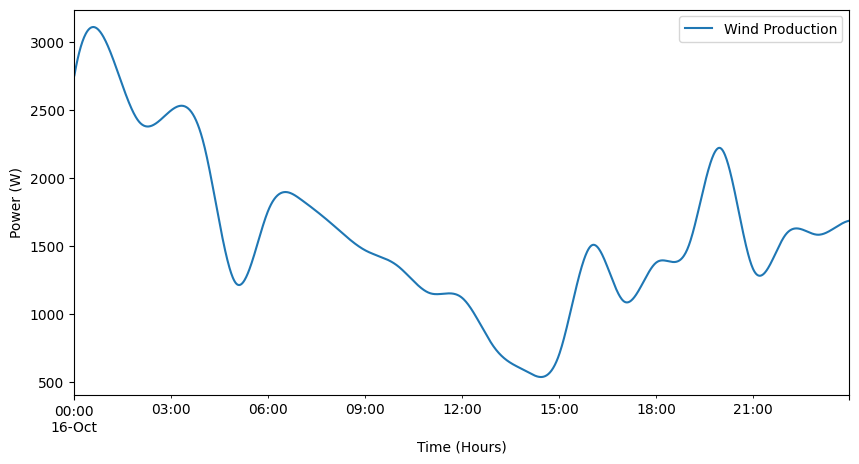

In [113]:
community_df[:24*60]["Wind_Production"].plot(legend=True, label='Wind Production')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (W)")
plt.show()

### Plot Total Production

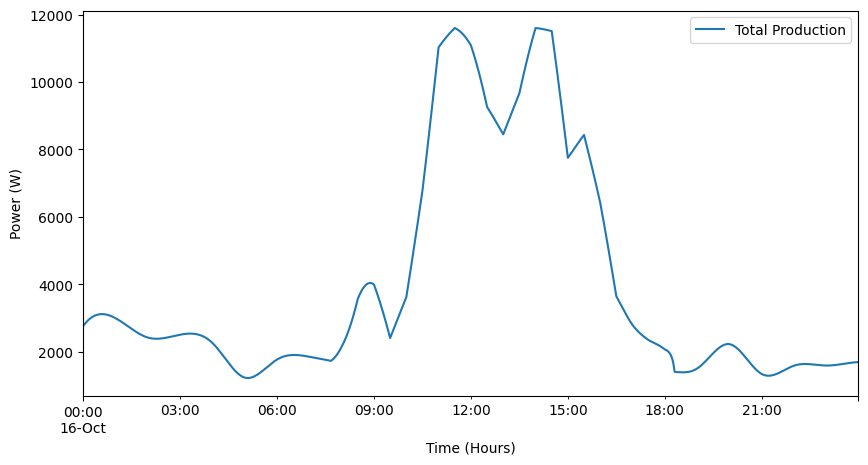

In [114]:
community_df[:24*60]["Production"].plot(legend=True, label='Total Production')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (W)")
plt.show()

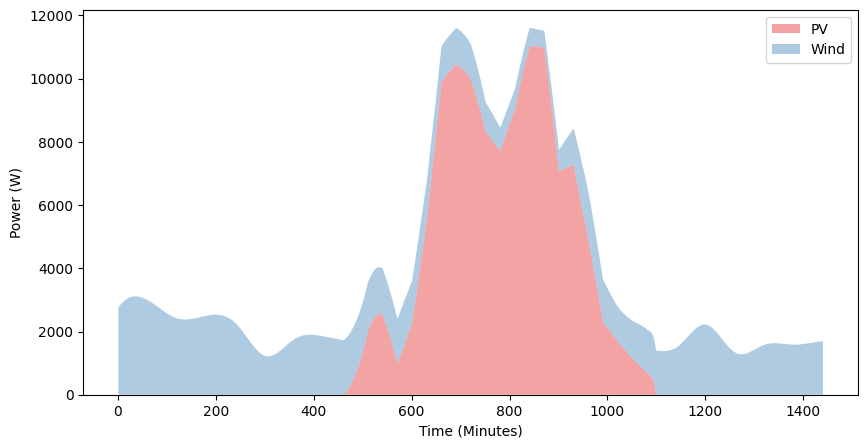

In [115]:
x = range(1,24*60+1)
 
pal = sns.color_palette("Set1")
plt.stackplot(x, [community_df[:24*60]["PV_Production"], community_df[:24*60]["Wind_Production"]], labels=['PV', 'Wind'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.xlabel("Time (Minutes)")
plt.ylabel("Power (W)")
plt.show()

### Plot Community Netload

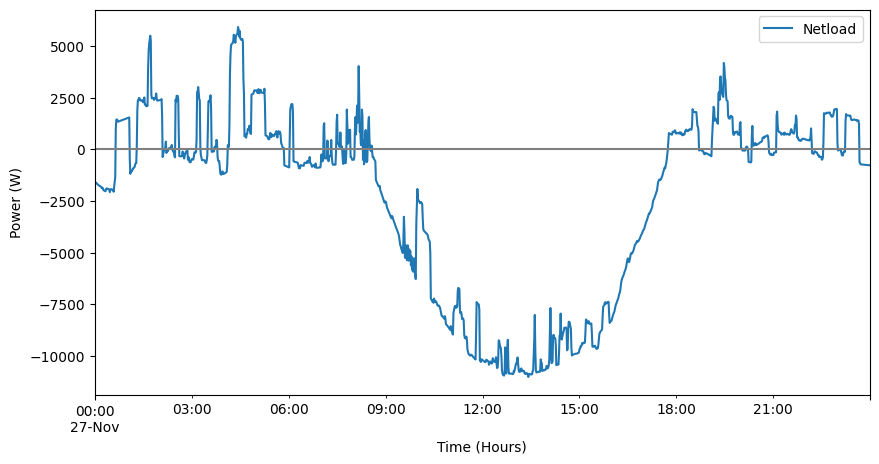

In [26]:
community_df[:24*60]["Netload"].plot(legend=True, label='Netload')
plt.axhline(y = 0, color = 'gray', linestyle = '-')
plt.xlabel("Time (Hours)")
plt.ylabel("Power (W)")
plt.show()

### Plot consumption of House 3

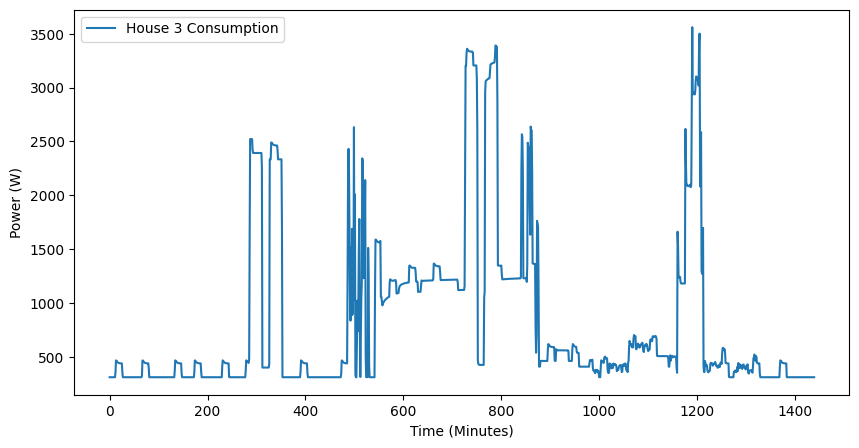

In [117]:
house3_total_df = pd.read_csv(path_steps_minutes + '/house3/total.csv', sep=';')
house3_total_df.columns = ['Date', 'Power']
house3_total_df['Date'] = pd.to_datetime(house3_total_df['Date'])

house3_total_df[:24*60]["Power"].plot(legend=True, label='House 3 Consumption')
plt.xlabel("Time (Minutes)")
plt.ylabel("Power (W)")
plt.show()

### Plot consumption of DW of House 4

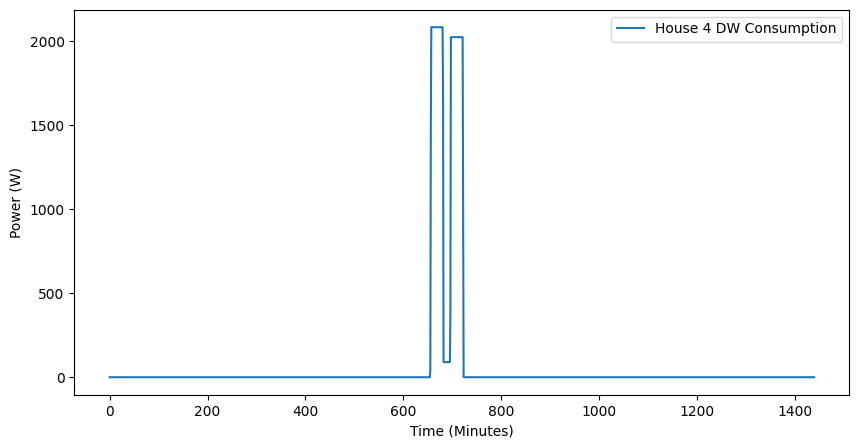

In [118]:
house4_wm_df = pd.read_csv(path_steps_minutes + '/house4/DISHWASHER.csv', sep=';')
house4_wm_df.columns = ['Date', 'Power']
house4_wm_df['Date'] = pd.to_datetime(house4_wm_df['Date'])

house4_wm_df[:24*60]["Power"].plot(legend=True, label='House 4 DW Consumption')
plt.xlabel("Time (Minutes)")
plt.ylabel("Power (W)")
plt.show()

### Plot consumption of Refrigerator of House 2

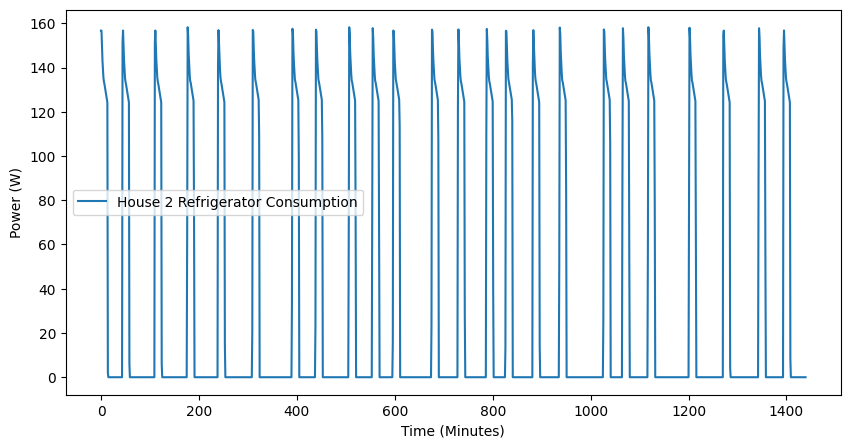

In [119]:
house2_refrigerator_df = pd.read_csv(path_steps_minutes + '/house2/REFRIGERATOR.csv', sep=';')
house2_refrigerator_df.columns = ['Date', 'Power']
house2_refrigerator_df['Date'] = pd.to_datetime(house2_refrigerator_df['Date'])

house2_refrigerator_df[:24*60]["Power"].plot(legend=True, label='House 2 Refrigerator Consumption')
plt.xlabel("Time (Minutes)")
plt.ylabel("Power (W)")
plt.show()

### Plot consumption of Cooking Dinner activity of House 1

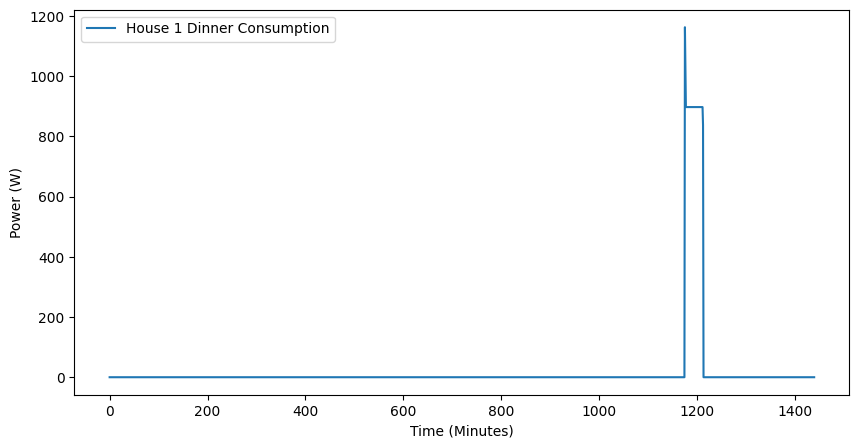

In [120]:
house1_dinner_df = pd.read_csv(path_steps_minutes + '/house1/cooking_a_dinner.csv', sep=';')
house1_dinner_df.columns = ['Date', 'Power']
house1_dinner_df['Date'] = pd.to_datetime(house1_dinner_df['Date'])

house1_dinner_df[:24*60]["Power"].plot(legend=True, label='House 1 Dinner Consumption')
plt.xlabel("Time (Minutes)")
plt.ylabel("Power (W)")
plt.show()

### Plot consumption of user Ann of House 2

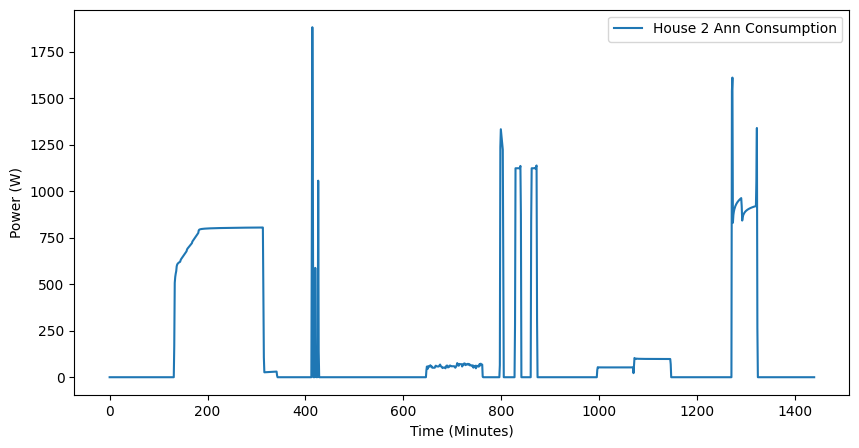

In [121]:
house2_ann_df = pd.read_csv(path_steps_minutes + '/house2/Ann.csv', sep=';')
house2_ann_df.columns = ['Date', 'Power']
house2_ann_df['Date'] = pd.to_datetime(house2_ann_df['Date'])

house2_ann_df[:24*60]["Power"].plot(legend=True, label='House 2 Ann Consumption')
plt.xlabel("Time (Minutes)")
plt.ylabel("Power (W)")
plt.show()

### Plot consumption of user Bill of House 2

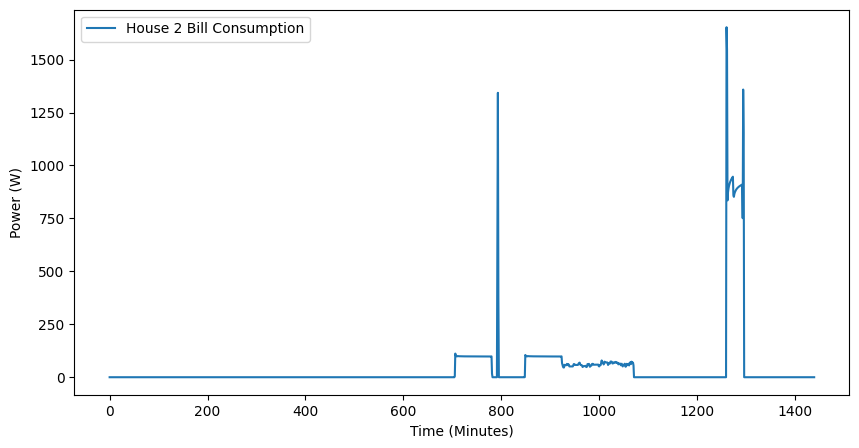

In [122]:
house2_bill_df = pd.read_csv(path_steps_minutes + '/house2/Bill.csv', sep=';')
house2_bill_df.columns = ['Date', 'Power']
house2_bill_df['Date'] = pd.to_datetime(house2_bill_df['Date'])

house2_bill_df[:24*60]["Power"].plot(legend=True, label='House 2 Bill Consumption')
plt.xlabel("Time (Minutes)")
plt.ylabel("Power (W)")
plt.show()